# Linear regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('db/ex1data1.txt', names=['population', 'profit'])
print data.shape
print data.head()

(97, 2)
   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


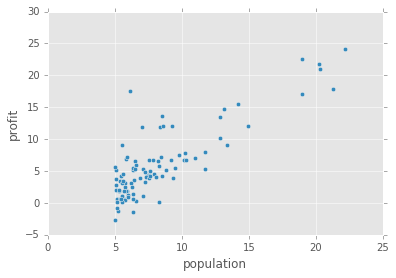

In [208]:
data.plot(kind='scatter',x='population',y='profit')

In [209]:
# percept term
c = np.ones(len(data.population))
# features
X = np.stack((c,data.population.values), axis=1)
y = data.profit.values
print X[0], y[0]

[ 1.      6.1101] 17.592


In [210]:
## Algorithm

In [211]:
def compute_cost(X, y, theta):
    J = 0.0
    for i in range(len(X)):
        prediction = np.dot(X[i],theta)
        J += (prediction - y[i])**2
    J = J/(2*len(X))
    return J

theta = np.zeros(2)
compute_cost(X, y, theta)

32.072733877455654

In [212]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        prediction = np.dot(X,theta)
        theta -= (alpha/len(X)) * np.dot((prediction - y), X)
        J_history.append(compute_cost(X,y,theta))
#         print theta, J_history
    return theta, J_history

theta = np.zeros(2)
iterations = 1500
alpha = 0.01
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print theta

[-3.63029144  1.16636235]


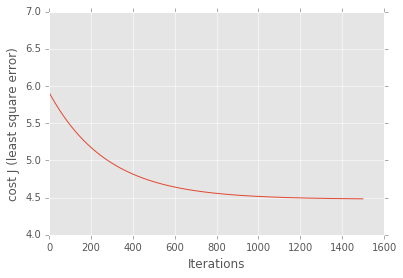

In [216]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("cost J (least square error)")

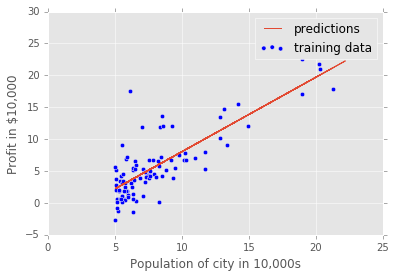

In [215]:
predictions = np.dot(X,theta)
plt.scatter(X[:,1], y, label='training data')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000")
plt.plot(X[:,1], predictions, label='predictions')
plt.legend()

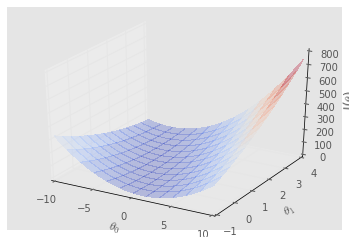

In [11]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(compute_cost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')

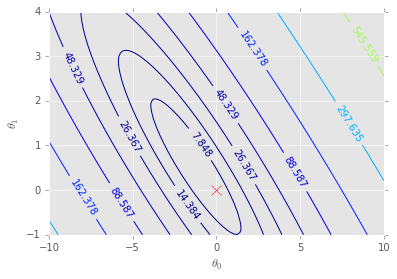

In [12]:
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.clabel(ax, inline=1, fontsize=10)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)

# Use linear_regression class

In [15]:
import linear_regression;reload(linear_regression)
from linear_regression import LinearRegression

In [16]:
X = data.population.values
y = data.profit.values
model = LinearRegression()
print linear_regression.least_square_error(model.predict(X), y)
model.fit(X,y, alpha = 0.01, n_iter = 1500)
pred = model.predict(X)

8.14370859725


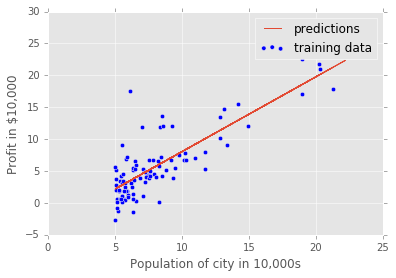

In [17]:
plt.scatter(X, y, label='training data')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000")
plt.plot(X, pred, label='predictions')
plt.legend()

In [18]:
# The coefficients
print 'Thetas:', model.theta
print "Mean squared error:", np.mean((model.predict(X) - y) ** 2)
print 'Correlation coefficient: ', model.score(model.predict(X), y)

Thetas: [-3.69602681  1.17296618]
Mean squared error: 8.96120800472
Correlation coefficient:  0.837873232526


# Compare with sklearn

In [19]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

In [20]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print diabetes_X_train.shape
print diabetes_y_train.shape
print diabetes_X_train.flatten()[:5]

(422, 1)
(422,)
[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]


In [21]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


<function matplotlib.pyplot.ylabel>

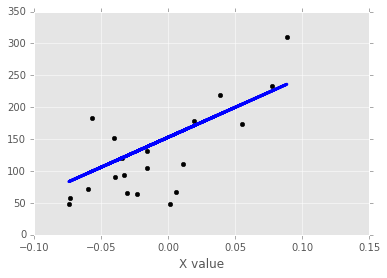

In [23]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.xlabel("X value")
plt.ylabel

In [48]:
import linear_regression;reload(linear_regression)
from linear_regression import LinearRegression
model = LinearRegression()
model.fit(diabetes_X_train.flatten(), diabetes_y_train, alpha = 0.1, n_iter = 10000)

In [45]:
# The coefficients
print('Coefficients: \n', model.theta)

print("Mean squared error: %.2f"
      % np.mean((model.predict(diabetes_X_test.flatten()) - diabetes_y_test) ** 2))

('Coefficients: \n', array([ 153.34713481,   20.21476127]))
Mean squared error: 5462.35


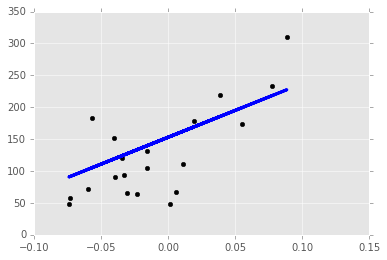

In [49]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, model.predict(diabetes_X_test.flatten()), color='blue',
         linewidth=3)

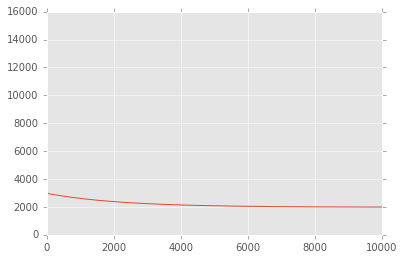

In [50]:
plt.plot(model.J)

# Linear regression with multiple variables

In [150]:
data = np.loadtxt('db/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.T.size

In [151]:
print X[:4]
print y[:4]
print m

[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]]
[ 399900.  329900.  369000.  232000.]
47


In [169]:
import linear_regression as lr;reload(linear_regression)

<module 'linear_regression' from 'linear_regression.py'>

### Feature normalization

In [152]:
X_norm = (X-np.mean(X))/np.std(X)
print X_norm.shape, np.mean(X_norm), np.std(X_norm)

(47, 2) -4.37002679906e-17 1.0


In [193]:
model = lr.LinearRegression()
model.fit(X_norm, y, alpha = 0.01, n_iter = 100)

0.855014495957


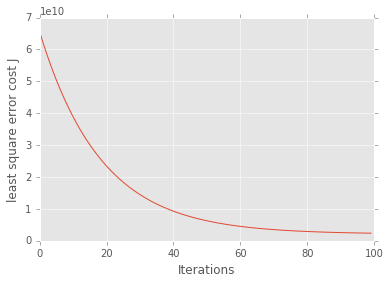

In [196]:
print model.score(X_norm,y)
plt.plot(range(len(model.J)),model.J)
plt.xlabel("Iterations")
plt.ylabel("least square error cost J")